In [3]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm
import seaborn as sns
sns.set_style("whitegrid")

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time
import random


# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Charger les données
file_path = "../../data/Loan_Data_Preprocessed.csv"
df = pd.read_csv(file_path)

In [5]:
df

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_to_income_ratio
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,0.059818
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,0.068253
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,0.126021
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,0.020481


In [6]:
#  Séparer les features et la cible
X = df.drop(columns=['customer_id', 'default'])  # Exclure l'ID client et la cible
y = df['default']

# Définition de variables
X_noms = X.columns

# Conversion en np.ndarray
X = np.array(X)
y = np.array(y)

# Définition de variables
dim = len(X[0])
nb_labels = len(np.unique(y))

In [7]:
# -----
# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42)
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y,100)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label


index = random.sample(range(len(X)),7000)
data_cv, label_cv = X[index], y[index]

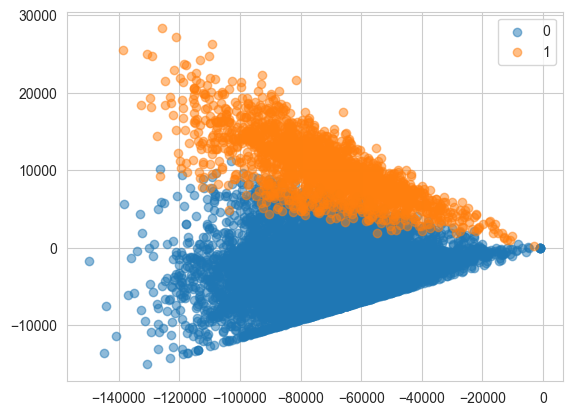

In [8]:
# A réaliser :

# 1) calcul des vecteurs propres
lam_train, V_train = np.linalg.eig(X.T @ X)
# lam_test, V_test = np.linalg.eig(XTu.T @ XTu)

# Trouver les indices des deux plus grandes valeurs propres
largest_indices = np.argsort(lam_train)[::-1][:2]



# Extraire les deux plus grandes valeurs propres et leurs vecteurs propres correspondants
largest_eigenvalues = lam_train[largest_indices]


max_train = V_train[:, largest_indices]
# max_test = V_test[:, np.argmax(lam_test)]


# 2) affichage (print)
#print("1er valeur rendue:\n", lam_train)
#print("2e valeur rendue :\n", V_train)

# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
#print("Vecteur train :\n", max_train)

# 4) affichage (plot) avec un code couleur pour les classes
for i in np.unique(y) :
  one_train = X[y==i]
  #print(one_train)

  projected_data_train = np.dot(one_train, max_train)

  plt.scatter(projected_data_train[:,0], projected_data_train[:,1],alpha=.5)


# ####################################
plt.legend(np.arange(10))

#plt.savefig("out/proj_usps_all.png",bbox_inches='tight', transparent=True,pad_inches=0)



# Perceptron de Rosenblatt

In [9]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine pour tester

# -----
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = classif.ClassifierPerceptron(dim,learning_rate=learning_rate)

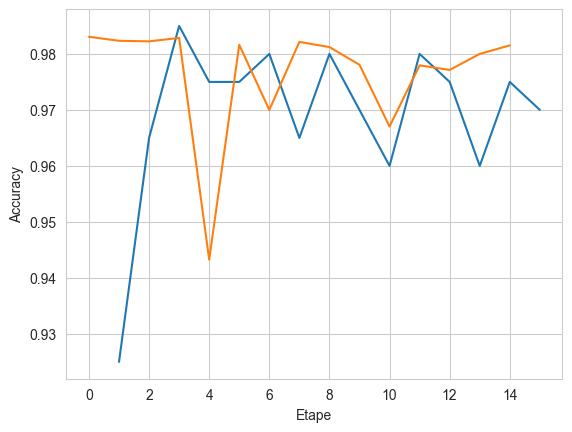

Accuracy finale (train):  0.97
Accuracy finale (test) :  0.9815306122448979


In [10]:
# -----
# Apprentissage pas à pas du perceptron et mémorisation de l'accuracy à chaque étape:
# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []

# Réalisation de N itérations
N = 15
for i in range(N) : 
    L_train = perceptron.train(data_train, label_train)
    train_acc.append(perceptron.accuracy(data_train, label_train))
    
    L_test = perceptron.train(data_test, label_test)
    test_acc.append(perceptron.accuracy(data_test, label_test))

# -----
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1,N+1),train_acc,test_acc)  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()


print("Accuracy finale (train): ", train_acc[len(train_acc)-1])
print("Accuracy finale (test) : ", test_acc[len(test_acc)-1])


Nb iterations réalisées:  100


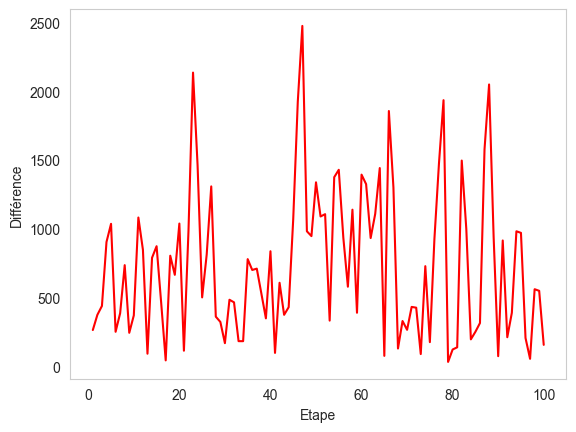

Les variations : [np.float64(263.32062512357135), np.float64(373.9094561794471), np.float64(438.3320737734309), np.float64(903.2768374931262), np.float64(1035.4569414291723), np.float64(250.63691841717437), np.float64(385.96279801099894), np.float64(735.1035755116958), np.float64(243.33086577403276), np.float64(369.8143564493726), np.float64(1081.3023903021094), np.float64(846.5778485992868), np.float64(91.24977696989272), np.float64(788.7047032020491), np.float64(872.8092635902308), np.float64(464.15666075231917), np.float64(42.72357434112327), np.float64(803.6917328758342), np.float64(664.8197502064842), np.float64(1037.4904053121302), np.float64(113.01165991487377), np.float64(981.3550081507748), np.float64(2134.9547372203488), np.float64(1461.0595318373464), np.float64(500.5543828928495), np.float64(811.6587233260528), np.float64(1307.5771471861044), np.float64(360.54737470159154), np.float64(322.2101844353618), np.float64(167.97204785460977), np.float64(483.44351396561643), np.flo

In [11]:
# Apprentissage du perceptron jusqu'à convergence
les_variations = perceptron.train(data_train, label_train)
print("Nb iterations réalisées: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations, color="red")  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.grid()
plt.show()

#L_train = perceptron2.train(data_train, label_train)
L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))


Nb iterations:  1000


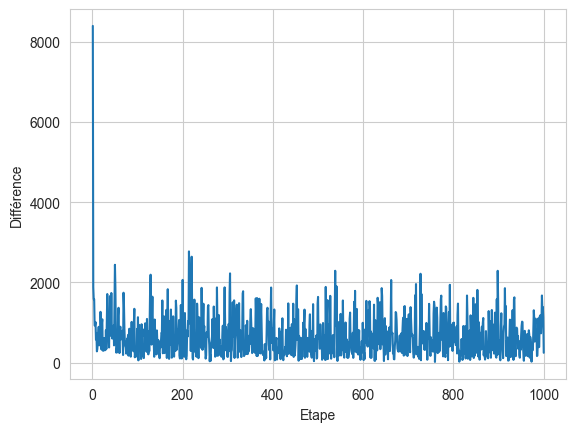

Les variations : [np.float64(8388.429706863175), np.float64(1882.577005468284), np.float64(1583.651751364245), np.float64(1582.7309099004256), np.float64(930.096827976533), np.float64(929.2931085319502), np.float64(1013.2702345198538), np.float64(577.8848569325822), np.float64(737.8906860349456), np.float64(284.40463808528824), np.float64(345.8919274277158), np.float64(596.5415363808002), np.float64(705.2122016540276), np.float64(895.4321193815839), np.float64(434.0587738325828), np.float64(882.4574899412371), np.float64(563.721147079898), np.float64(1268.7356177523613), np.float64(924.3558375516318), np.float64(334.1158488801981), np.float64(968.3573897871637), np.float64(1082.6959701327294), np.float64(304.1664078681191), np.float64(601.4397278870059), np.float64(303.87898571159974), np.float64(614.0555637079409), np.float64(608.2339307915456), np.float64(312.7893367382455), np.float64(318.46180578879654), np.float64(808.9885578964365), np.float64(343.3044747486566), np.float64(1114.

In [12]:
# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42) 
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y, 500)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000)
print("Nb iterations: ", len(les_variations))


# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

L_test = perceptron.train(data_test, label_test)
print("Les variations :", les_variations)
print("Accuracy finale (train): ", perceptron.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron.accuracy(data_test, label_test))

Nb iterations:  1000


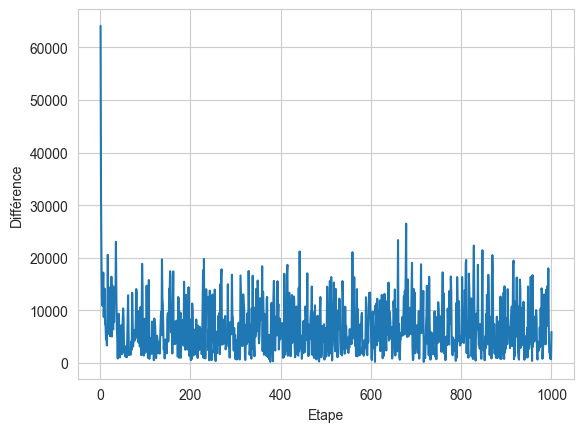

Accuracy finale (train):  0.979
Accuracy finale (test) :  0.9796666666666667


In [13]:
# Par exemple : 

# ------------------------ COMPLETER LES INSTRUCTIONS DANS CETTE BOITE 

np.random.seed(42)   # on prend 42 comme graine

# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42) 
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y, 500)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label

# Création d'un perceptron avec initialisation aléatoire et le learning_rate ci-dessous:
learning_rate = 0.1
perceptron = classif.ClassifierPerceptron(dim, learning_rate=learning_rate, init=True)

# Apprentissage du perceptron
les_variations = perceptron.train(data_train,label_train,nb_max=1000,seuil=1E-6)
print("Nb iterations: ", len(les_variations))

# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()

print("Accuracy finale (train): ", perceptron.accuracy(data_train,label_train) )
print("Accuracy finale (test) : ", perceptron.accuracy(data_test,label_test) )


In [14]:
print("------ affichage validation croisée")

#################################

# ce qui se passe:
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(perceptron, (data_cv, label_cv), 10)
toc= time.time()

print("------ fin affichage validation croisée")

print("Validation croisée sur pen_dataset :")
print("Perf obtenues : ",res_all)
print(f'Accuracy moyenne: {res_moy:0.3f}\técart type: {res_sd:0.4f}')
print(f'Résultat en {(toc-tic):0.4f} secondes.')

------ affichage validation croisée
Itération 0  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9785714285714285
Itération 1  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9657142857142857
Itération 2  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9728571428571429
Itération 3  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9671428571428572
Itération 4  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9814285714285714
Itération 5  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9842857142857143
Itération 6  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9785714285714285
Itération 7  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9857142857142858
Itération 8  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9814285714285714
Itération 9  : taille base a